In [1]:
########## Calling relevant libraries ##########
%matplotlib inline
import numpy as np

# Setting matplotlib options for this notebook
import matplotlib
from matplotlib import pyplot as plt

import tensorflow as tf

/Users/charles/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charles/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Create fake data
X_train = np.concatenate((np.linspace(0,100,100).reshape(-1,1),
                          np.linspace(0,200,100).reshape(-1,1),
                        np.linspace(500,1000,100).reshape(-1,1)),axis=1)
print(X_train.shape)
y_train = 10*X_train[:,0] + 1e-5* X_train[:,1]/X_train[:,2]
print(y_train.shape)

(100, 3)
(100,)


In [12]:
# Create a simple feed forward model

input_size = X_train.shape[1]
hidden_size = 10
out_size = 1

input_x = tf.placeholder(dtype=tf.float32, shape=[None,input_size], name="x")
input_y = tf.placeholder(dtype=tf.float32, shape=[None,1], name="y")

Wh1 = tf.Variable(tf.random_normal([input_size,hidden_size], stddev=1e-3, dtype=tf.float32))
bh1 = tf.Variable(tf.random_normal([1,hidden_size], stddev=1e-3, dtype=tf.float32))
            
hidden_layer_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(input_x, Wh1) + bh1),
                                                keep_prob=1.)

Wo = tf.Variable(tf.random_normal([hidden_size,out_size], mean=0.,stddev=1e-3, dtype=tf.float32))
bo = tf.Variable(tf.random_normal([1,out_size], stddev=1e-3, dtype=tf.float32))

output = tf.add(tf.matmul(hidden_layer_1,Wo),bo,name="out_neurons")

loss = tf.nn.l2_loss(output-input_y)
optimizer = tf.train.RMSPropOptimizer(1e-4).minimize(loss)

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

NEPOCH = 1000
loss_train = np.zeros(NEPOCH) # store the training progress here.

for i in range(NEPOCH):
    dct_train = {input_x: X_train, input_y: y_train.reshape(-1,1)}
    
    sess.run(optimizer,feed_dict=dct_train)
    loss_train[i] = sess.run(loss, feed_dict=dct_train)

In [14]:
loss_train

array([16750512., 16750384., 16750255., 16750124., 16749990., 16749853.,
       16749712., 16749569., 16749420., 16749269., 16749115., 16748957.,
       16748797., 16748631., 16748463., 16748290., 16748116., 16747938.,
       16747756., 16747570., 16747382., 16747191., 16746995., 16746795.,
       16746593., 16746388., 16746177., 16745965., 16745750., 16745529.,
       16745306., 16745079., 16744849., 16744616., 16744379., 16744139.,
       16743896., 16743648., 16743397., 16743143., 16742886., 16742624.,
       16742360., 16742092., 16741821., 16741547., 16741269., 16740988.,
       16740701., 16740414., 16740122., 16739828., 16739529., 16739226.,
       16738922., 16738613., 16738301., 16737986., 16737668., 16737344.,
       16737018., 16736689., 16736357., 16736021., 16735683., 16735341.,
       16734994., 16734645., 16734293., 16733937., 16733577., 16733214.,
       16732849., 16732479., 16732107., 16731730., 16731351., 16730969.,
       16730582., 16730193., 16729799., 16729404., 

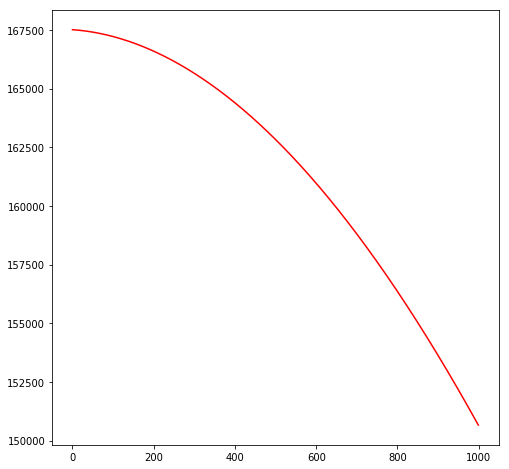

In [15]:
plt.figure(figsize=(8, 8))
plt.plot(np.arange(0, NEPOCH,1), loss_train/X_train.shape[0], 'r-')
plt.show()

In [17]:
tf.saved_model.simple_save(sess,
            "./test/8_",
            inputs={"x":input_x,"y":input_y},
            outputs={"pred": output})

INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./test/8_/saved_model.pb


In [18]:
sess.close()

# Some new data for which we want predictions
X_test = np.concatenate((np.linspace(50,80,100).reshape(-1,1),
                          np.linspace(10,100,100).reshape(-1,1),
                        np.linspace(600,800,100).reshape(-1,1)),axis=1)

#T_test = np.linspace(600,800,100).reshape(-1,1)

from tensorflow.python.saved_model import tag_constants

restored_graph = tf.Graph()
with restored_graph.as_default():
    with tf.Session(graph=restored_graph) as sess:
        # Restore saved values
        print('\nRestoring...')
        tf.saved_model.loader.load(
            sess,
            [tag_constants.SERVING],
            "./test/7_"
        )
        print('Ok')
        
        # Get restored placeholders
        x = restored_graph.get_tensor_by_name('x:0')
        #t = restored_graph.get_tensor_by_name('t:0')
        y = restored_graph.get_tensor_by_name('y:0')
        
        # Get predictions
        pred = restored_graph.get_tensor_by_name('out_neurons:0')
        
        predictions_test1 = sess.run(pred, feed_dict={x: X_test})
        
        predictions_test2 = sess.run(pred, feed_dict={x: X_test})


Restoring...
INFO:tensorflow:Restoring parameters from ./test/7_/variables/variables
Ok


In [19]:
predictions_test1 == predictions_test2

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [